<a href="https://colab.research.google.com/github/Paulinho19/servidores_gdf/blob/main/Base_de_remunera%C3%A7%C3%A3o_dos_servidores_do_GDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt


orig_url='https://drive.google.com/file/d/1UrlwBHa47H5lpAkLtDsfuEWfTMQj491X/view?usp=sharing'


file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
remuneracao_servidores_df = pd.read_csv(csv_raw,sep=';',low_memory=False)

Conversão de valores para padrão americano

In [ ]:
remuneracao_servidores_df['BRUTO'] = remuneracao_servidores_df['BRUTO'].str.replace(',', '').astype(float)
remuneracao_servidores_df['IRRF'] = remuneracao_servidores_df['IRRF'].str.replace(',', '').astype(float)
remuneracao_servidores_df['LÍQUIDO'] = remuneracao_servidores_df['LÍQUIDO'].str.replace(',', '').astype(float)

**Qual o espaço amostral compreendido nesta base de dados?** O espaço amostral da base de dados corresponde à 237.125 servidores.

In [ ]:
remuneracao_servidores_df.shape

(237125, 25)

**Quantos servidores estão lotados no corpo de bombeiros?** Observa-se 12.434 servidores lotados no corpo de bombeiros.

In [ ]:
remuneracao_servidores_df[(remuneracao_servidores_df['ÓRGÃO'] == "CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL - SIAPE")]['MATRÍCULA'].count()

12434

**Qual o órgão público com maior número de funcionários?** O órgão que possui mais funcionários é a secretaria de estado de educação, com 66.126 servidores.

In [ ]:
remuneracao_servidores_df.value_counts('ÓRGÃO')

ÓRGÃO
SECRETARIA DE ESTADO DE EDUCACAO                                                    66126
SECRETARIA DE ESTADO DE SAUDE                                                       52640
POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE                                         27626
INSTITUTO DE PREVIDENCIA DOS SERVIDORES DO DISTRITO FEDERAL                         17176
CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL - SIAPE                               12434
                                                                                    ...  
CEB PARTICIPACOES S.A.                                                                  8
COMPANHIA BRASILIENSE DE GAS - CEBGAS                                                   8
FUNDO CAPITALIZADO DOS SERVIDORES DO DISTRITO FEDERAL                                   6
BRB-CRED, FINANC. E INV. S.A.                                                           5
BRB-DISTR.TIT.E VAL.MOBIL.S.A.                                                          5
Leng

**Qual a probabilidade de ao escolher uma linha ao acaso, ser de um funcionário que trabalha na secretaria de educação?** A probabilidade que da escolha bater com um funcionário da secretária de educação é de 27,89%

In [ ]:
remuneracao_servidores_df.value_counts('ÓRGÃO')

ÓRGÃO
SECRETARIA DE ESTADO DE EDUCACAO                                                    66126
SECRETARIA DE ESTADO DE SAUDE                                                       52640
POLICIA MILITAR DO DISTRITO FEDERAL - SIAPE                                         27626
INSTITUTO DE PREVIDENCIA DOS SERVIDORES DO DISTRITO FEDERAL                         17176
CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL - SIAPE                               12434
                                                                                    ...  
CEB PARTICIPACOES S.A.                                                                  8
COMPANHIA BRASILIENSE DE GAS - CEBGAS                                                   8
FUNDO CAPITALIZADO DOS SERVIDORES DO DISTRITO FEDERAL                                   6
BRB-CRED, FINANC. E INV. S.A.                                                           5
BRB-DISTR.TIT.E VAL.MOBIL.S.A.                                                          5
Leng

In [ ]:
(66126/237125)*100

27.886557722720084

**Liste todas as funções contidas na base**

In [ ]:
remuneracao_servidores_df.FUNÇÃO

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
237120                COORDENADOR ADM E SUPORTE OPERACIONAL
237121    DIRETOR DA DIRETORIA DE COMERCIALIZAÇÃO E NOVO...
237122                                           PRESIDENTE
237123                                   CONSULTOR JURIDICO
237124    GERENTE                                       ...
Name: FUNÇÃO, Length: 237125, dtype: object

**Qual órgão publico possui a maior média salarial?** Administração Regional da Candangolândia possui a maior média salarial.

In [ ]:
remuneracao_servidores_df.groupby('ÓRGÃO')['BRUTO'].mean()



ÓRGÃO
ADMINISTRACAO REGIONAL DA CANDANGOLANDIA                                            2.371928e+05
ADMINISTRACAO REGIONAL DA FERCAL                                                    2.278233e+05
ADMINISTRACAO REGIONAL DE AGUAS CLARAS                                              4.199384e+05
ADMINISTRACAO REGIONAL DE ARNIQUEIRA                                                1.311176e+05
ADMINISTRACAO REGIONAL DE BRAZLANDIA                                                2.999085e+05
                                                                                        ...     
SOCIEDADE DE ABASTECIMENTO DE BRASILIA - SAB                                        8.243052e+05
SOCIEDADE DE TRANSPORTES COLETIVOS DE BRASILIA LTDA.                                3.723744e+05
TERRACAP                                                                            1.821396e+06
UNIVERSIDADE DO DISTRITO FEDERAL PROFESSOR JORGE AMAURY MAIA NUNES                  1.283276e+05
VICE-GOVERNADORIA       

**O servidor com maior remuneração básica pertence a qual órgão?** Pertence à Administração Regional da Candangolândia

In [ ]:
remuneracao_servidores_df.groupby('ÓRGÃO')['REMUNERAÇÃO BÁSICA'].max()

ÓRGÃO
ADMINISTRACAO REGIONAL DA CANDANGOLANDIA                                            7510,15
ADMINISTRACAO REGIONAL DA FERCAL                                                    8467,56
ADMINISTRACAO REGIONAL DE AGUAS CLARAS                                              9716,63
ADMINISTRACAO REGIONAL DE ARNIQUEIRA                                                 756,14
ADMINISTRACAO REGIONAL DE BRAZLANDIA                                                9922,19
                                                                                     ...   
SOCIEDADE DE ABASTECIMENTO DE BRASILIA - SAB                                         9453,9
SOCIEDADE DE TRANSPORTES COLETIVOS DE BRASILIA LTDA.                                 968,32
TERRACAP                                                                            9992,57
UNIVERSIDADE DO DISTRITO FEDERAL PROFESSOR JORGE AMAURY MAIA NUNES                   744,53
VICE-GOVERNADORIA                                                         

**Qual o valor pago para todos os funcionários públicos?** O valor pago equivale a R$228.494.720.517,00

In [ ]:
remuneracao_servidores_df['BRUTO'].sum()

228494720517.0

**Elabore um gráfico de pizza com a remuneração bruta dos servidores por órgão**

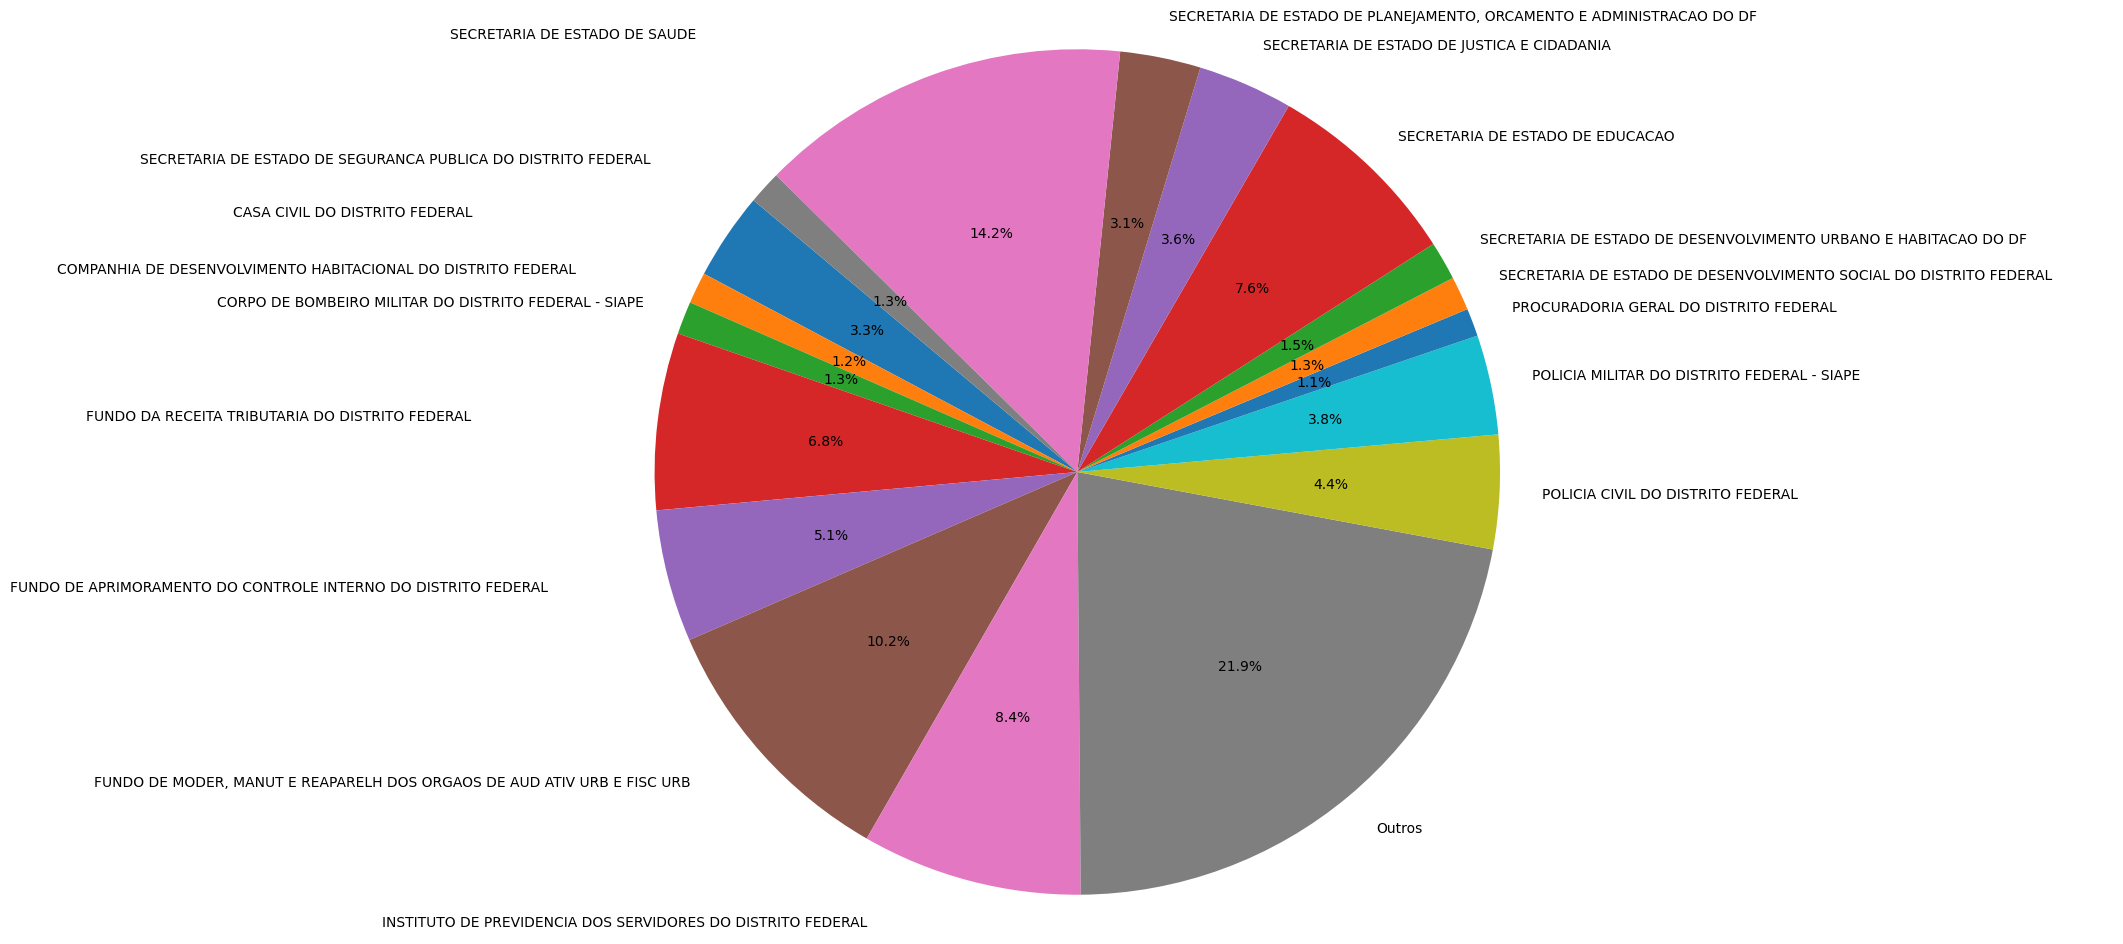

In [ ]:

remuneracao_servidores_df.reset_index(inplace=True, drop=True)


remuneracao_servidores_df['BRUTO'] = pd.to_numeric(remuneracao_servidores_df['BRUTO'], errors='coerce')


remuneracao_servidores_df.dropna(subset=['BRUTO'], inplace=True)


remuneracao_servidores_df = remuneracao_servidores_df.groupby('ÓRGÃO', as_index=False)['BRUTO'].sum()


remuneracao_servidores_df['BRUTO'] = remuneracao_servidores_df['BRUTO'].abs()


remuneracao_servidores_df.sort_values(by='BRUTO', ascending=False, inplace=True)


threshold = 0.01
small_values = remuneracao_servidores_df[remuneracao_servidores_df['BRUTO'] / remuneracao_servidores_df['BRUTO'].sum() < threshold]

remuneracao_servidores_df.loc[small_values.index, 'ÓRGÃO'] = 'Outros'
remuneracao_servidores_df = remuneracao_servidores_df.groupby('ÓRGÃO', as_index=False)['BRUTO'].sum()

plt.figure(figsize=(12, 12))
plt.pie(remuneracao_servidores_df['BRUTO'], labels=remuneracao_servidores_df['ÓRGÃO'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

**Elabore um gráfico de boxplot com a situação do servidor e sua remuneração liquida**

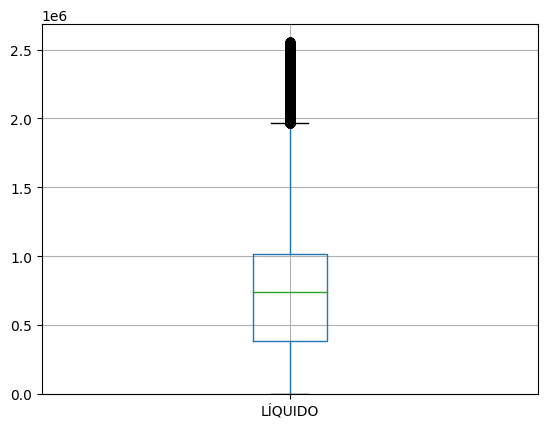

In [ ]:
df_positivos = remuneracao_servidores_df[remuneracao_servidores_df['LÍQUIDO'] > 0]

percentil_99 = df_positivos['LÍQUIDO'].quantile(0.99)
df_limitado = df_positivos[df_positivos['LÍQUIDO'] <= percentil_99]

df_limitado.boxplot('LÍQUIDO')
plt.ylim(bottom=0)
plt.show()


**Identifique qual órgão possui salário liquido com menos variações, utilizando para isto medidas de dispersão** O órgão que possui menor variação no salário líquido é o **Fundo de Apoio ao Esporte - FAE**

In [ ]:
remuneracao_servidores_df.groupby('ÓRGÃO')['LÍQUIDO'].std().agg(['idxmin', 'min'])

idxmin    FUNDO DE APOIO AO ESPORTE - FAE               ...
min                                            13772.649309
Name: LÍQUIDO, dtype: object

**Calcule o índice de correlação entre o IRRF e os salários liquido e bruto. Em qual dos casos o índice de correlação foi maior?** O índice de correlação foi maior no caso em que foi comparado a coluna de imposto de renda com a coluna de salários brutos.

In [ ]:
remuneracao_servidores_df['IRRF'].corr(remuneracao_servidores_df['BRUTO'])

0.6714354678348532

In [ ]:
remuneracao_servidores_df['IRRF'].corr(remuneracao_servidores_df['LÍQUIDO'])

0.5936694248497816

**Adicione uma nova coluna que irá conter a diferença entre o salario bruto e líquido**

In [ ]:
remuneracao_servidores_df['SALÁRIO_BRUTO - SALÁRIO_LÍQUIDO'] = remuneracao_servidores_df['BRUTO'] - remuneracao_servidores_df['LÍQUIDO']
remuneracao_servidores_df

,MATRÍCULA,ÓRGÃO,CARGO,FUNÇÃO,SITUAÇÃO,MÊS,ANO,CÓDIGO DO ÓRGÃO,REMUNERAÇÃO BÁSICA,BENEFÍCIOS,...,LICENÇA PRÊMIO,IRRF,SEG. SOCIAL,TETO REDUTOR,OUTROS RECEBIMENTOS,OUTROS DESCONTOS OBRIGATÓRIOS,PAGAMENTOS A MAIOR,BRUTO,LÍQUIDO,SALÁRIO_BRUTO - SALÁRIO_LÍQUIDO
0,79407972,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"4022,24",0,...,0,16708.0,0,0,0,0,0,402224.0,385516.0,16708.0
1,67783779,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"9003,99",0,...,0,82315.0,0,0,0,0,0,900399.0,818084.0,82315.0
2,12817273,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"8562,93",0,...,0,71459.0,0,0,0,0,0,856293.0,784834.0,71459.0
3,14242673,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"4280,47",0,...,0,20059.0,0,0,0,0,0,428047.0,407988.0,20059.0
4,50834073,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"7605,15",0,...,0,44749.0,0,0,0,0,0,760515.0,715766.0,44749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237120,4729,COMPANHIA ENERGETICA DE BRASILIA,COORDENADOR ADM E SUPORTE OPERACIONAL,COORDENADOR ADM E SUPORTE OPERACIONAL,ATIVO,1,2023,1219208,"4926,15",0,...,0,29879.0,0,0,0,0,0,492615.0,462736.0,29879.0
237121,2619,TERRACAP,DIRETOR,DIRETOR DA DIRETORIA DE COMERCIALIZAÇÃO E NOVO...,OUTROS,1,2023,2250001,"54653,61","424,16",...,0,1246997.0,"825,82",0,0,0,0,5507777.0,4178198.0,1329579.0
237122,2870,TERRACAP,PRESIDENTE,PRESIDENTE,OUTROS,1,2023,2250001,"54653,61","791,98",...,0,1377687.0,"825,82",0,0,0,0,5544559.0,408429.0,5136130.0
237123,263,COMPANHIA ENERGETICA DE BRASILIA,CONSULTOR JURIDICO,CONSULTOR JURIDICO,OUTROS,1,2023,1219208,"2344,56",0,...,0,0.0,0,0,0,"1860,4",0,234456.0,48416.0,186040.0


***Qual a correlação entre o IRRF pago e esta nova coluna?*** Os dois valores aumentam proporcionalmente.




In [ ]:
remuneracao_servidores_df['IRRF'].corr(remuneracao_servidores_df['SALÁRIO_BRUTO - SALÁRIO_LÍQUIDO'])

0.34916436779994464

**Qual órgão apresenta índice de correlação entre IRRF e diferença salarial maior?** Administração regional da Candangolândia possui maior índice de correlação.

In [ ]:
remuneracao_servidores_df['IRRF - DIFERENÇA SALARIAL'] = remuneracao_servidores_df['IRRF'].corr(remuneracao_servidores_df['SALÁRIO_BRUTO - SALÁRIO_LÍQUIDO'])
remuneracao_servidores_df.groupby('ÓRGÃO')['IRRF - DIFERENÇA SALARIAL'].max()

ÓRGÃO
ADMINISTRACAO REGIONAL DA CANDANGOLANDIA                                            0.349164
ADMINISTRACAO REGIONAL DA FERCAL                                                    0.349164
ADMINISTRACAO REGIONAL DE AGUAS CLARAS                                              0.349164
ADMINISTRACAO REGIONAL DE ARNIQUEIRA                                                0.349164
ADMINISTRACAO REGIONAL DE BRAZLANDIA                                                0.349164
                                                                                      ...   
SOCIEDADE DE ABASTECIMENTO DE BRASILIA - SAB                                        0.349164
SOCIEDADE DE TRANSPORTES COLETIVOS DE BRASILIA LTDA.                                0.349164
TERRACAP                                                                            0.349164
UNIVERSIDADE DO DISTRITO FEDERAL PROFESSOR JORGE AMAURY MAIA NUNES                  0.349164
VICE-GOVERNADORIA                                               